# 1. OpenCV 설치

OpenCV(Open Source Computer Vision Libary)는 이미지를 다루는 분야에서 가장 널리 이용되고 인기 있는 라이브러리이며, 이미지를 처리하기 위한 편리한 기능을 대부분 담고 있다. 아래의 명령어를 통해 설치가 가능하다.


```
pip install opencv-python
```



In [1]:
import cv2
cv2.__version__

'4.5.3'

# 2. 이미지 로드
여기서 활용하는 샘플 이미지는 해당 책의 [github](https://github.com/rickiepark/machine-learning-with-python-cookbook/tree/master/images) 에서 다운받을 수 있다.

먼저 앞으로 공통적으로 계속 사용 될 라이브러리를 임포트한다.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# from google.colab.patches import cv2_imshow

imread() 메소드를 통해 이미지를 로드 후 opencv, matplotlib을 통해 출력해본다.



In [9]:
image = cv2.imread('images/plane.jpeg', cv2.IMREAD_GRAYSCALE)

cv2.imshow('image', image) # cv2.imshow('image', image)

위 이미지의 type 및 shape을 출력해보면 아래와 같다.



In [10]:
print(type(image))
image.shape 

<class 'numpy.ndarray'>


(2270, 3600)

이미지 데이터는 본래 개별 원소로 이루어진 행렬의 집합이다. 여기서 개별 원소는 픽셀(pixel)이라고 할 수 있으며 개별 원소의 값은 픽셀의 강도라고 할 수 있다. 그리고 픽셀의 강도는 0(검정)부터 255(흰색) 사이의 범위를 가지고 있다.

이미지를 행렬 그대로 출력하게 되면 아래와 같이 표현된다.

In [11]:
image

array([[140, 136, 146, ..., 132, 139, 134],
       [144, 136, 149, ..., 142, 124, 126],
       [152, 139, 144, ..., 121, 127, 134],
       ...,
       [156, 146, 144, ..., 157, 154, 151],
       [146, 150, 147, ..., 156, 158, 157],
       [143, 138, 147, ..., 156, 157, 157]], dtype=uint8)

컬러를 이미지를 읽기 위해서는 imread() 메소드에 cv2.IMREAD_COLOR 매개변수를 넣어주면 된다. 그런데 주의할점은 OpenCV는 기본적으로 이미지를 BGR타입으로 읽는다는 것이다. 하지만 Matplotlib등 대부분의 이미지 라이브러리는 RGB타입을 사용하기 때문에 BGR RGB타입으로 변경해주는 것이 좋다.

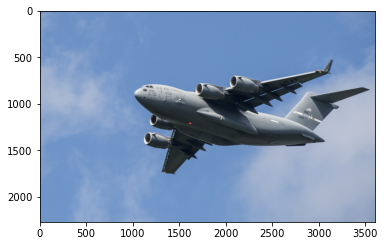

In [12]:
# 컬러 이미지 로드
image_bgr = cv2.imread('images/plane.jpeg', cv2.IMREAD_COLOR)

# RGB타입으로 변환
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# plot
plt.imshow(image_rgb); plt.show()

# 3. 이미지 저장
OpenCV의 imwrite() 메소드를 사용하여 이미지를 저장할 수 있다.

In [13]:
# 이미지 로드 
image = cv2.imread('images/plane.jpeg', cv2.IMREAD_GRAYSCALE)
# 이미지 저장 
cv2.imwrite('images/new_plane.jpeg', image)

True

# 4. 이미지 크기 변경
OpenCV의 resize() 메소드를 이용하여 이미지 크기 변경이 가능하다.
256x256 크기의 이미지를 로드한 후 이를 50x50 크기의 이미지로 변경한 후 출력해본다.

Text(0.5, 1.0, 'Resized Image')

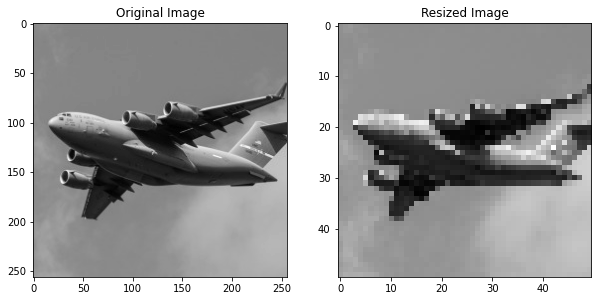

In [14]:
image = cv2.imread('images/plane_256x256.jpeg', cv2.IMREAD_GRAYSCALE)
# 이미지 크기를 50x50으로 변경
image_50x50 = cv2.resize(image, (50, 50))

# 출력 
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(image_50x50, cmap='gray')
ax[1].set_title('Resized Image')

Text(0.5, 1.0, 'Resized Image')

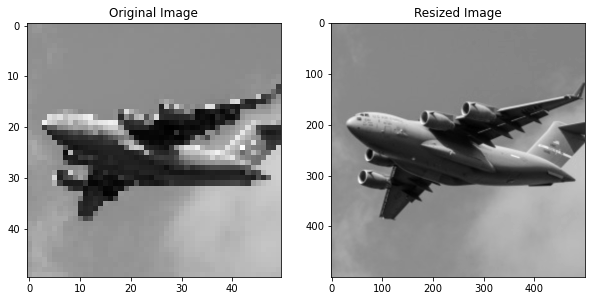

In [19]:
image = cv2.imread('images/plane_256x256.jpeg', cv2.IMREAD_GRAYSCALE)
# 이미지 크기를 50x50으로 변경
image_500x500 = cv2.resize(image, (500, 500))

# 출력
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image_50x50, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(image_500x500, cmap='gray')
ax[1].set_title('Resized Image')


In [26]:
cv2.imshow('image', image_50x50)

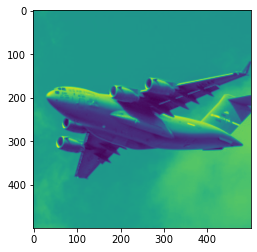

In [25]:
plt.imshow(image_500x500)

# 5. 이미지 자르기(crop)
이미지를 자르고 싶을 경우 배열 슬라이싱을 이용하여 원하는 부분만 crop할 수 있다.



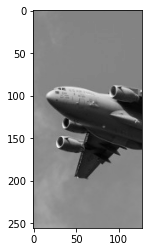

In [27]:
image = cv2.imread('images/plane_256x256.jpeg', cv2.IMREAD_GRAYSCALE)

# 이미지의 모든 행과 열의 절반만 선택
image_cropped = image[:,:128]

plt.imshow(image_cropped, cmap='gray')
plt.show()

# 6. 이미지 blur 처리
이미지를 흐리게 하기 위해서는 각 픽셀을 주변 픽셀의 평균값으로 변환하면 되며, 이렇게 주변 픽셀에 수행되는 연산을 커널(kernel)이라고 한다. 커널이 클수록 이미지가 더 부드러워지게 된다.

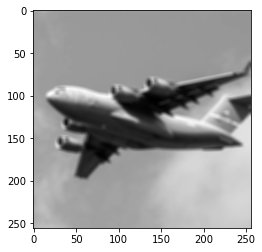

In [28]:
# 이미지 로드 
image = cv2.imread('images/plane_256x256.jpeg', cv2.IMREAD_GRAYSCALE)
# blur() : 각 픽셀에 커널 개수의 역수를 곱하여 모두 더함
image_blurry = cv2.blur(image, (5,5)) # 5 x 5 커널 평균값으로 이미지를 흐리게 함 

plt.imshow(image_blurry, cmap='gray')
plt.show()

100x100 커널과 같이 큰 커널을 적용할 경우 이미지가 훨씬 뭉개지게 된다.

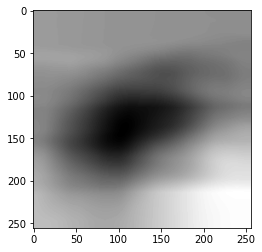

In [29]:
image_very_blurry = cv2.blur(image, (100,100))

plt.imshow(image_very_blurry, cmap='gray')
plt.show()

아래와 같이 커널을 직접 정의한 후 filter2D() 메소드를 통해 이미지에 적용하는 것도 가능하다.
생성된 커널을 이미지에 적용 시 중앙 원소가 변환되는 픽셀이며, 나머지는 그 픽셀의 이웃이 된다.

In [30]:
# 커널 생성 
kernel = np.ones((10,10)) / 25.0 # 모두 더하면 1이 되도록 정규화
kernel 

array([[0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04]])

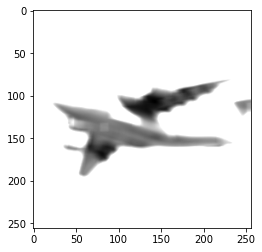

In [31]:
# filter2D함수로 커널을 이미지에 직접 적용 
image_kernel = cv2.filter2D(image, -1, kernel)

plt.imshow(image_kernel, cmap='gray')
plt.show()

자주 사용되는 블러 함수로 가우시안 분포를 사용하는 가우시안 블러(GaussianBlur)가 있다. GaussianBlur() 함수의 세 번째 매개변수는 X축(너비) 방향의 표준편차이며, 0으로 지정하면 ((너비-1)0.5-1)0.3+0.8과 같이 계산된다.

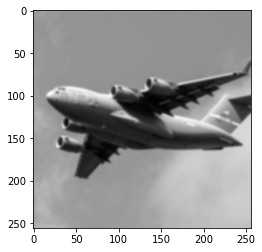

In [32]:
image_very_blurry = cv2.GaussianBlur(image, (5,5), 0) 

plt.imshow(image_very_blurry, cmap='gray')
plt.show()

# 7. 이미지 선명하게 표현
대상 픽셀을 강조하는 커널을 정의한 후 filter2D() 메소드를 사용하여 이미지에 적용한다.

Text(0.5, 1.0, 'Sharp Image')

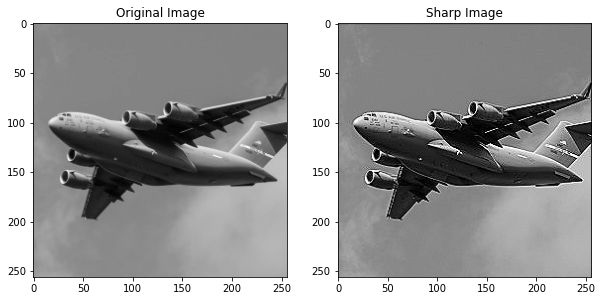

In [33]:
image = cv2.imread('images/plane_256x256.jpeg', cv2.IMREAD_GRAYSCALE)

# 커널 생성(대상이 있는 픽셀을 강조)
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

# 커널 적용 
image_sharp = cv2.filter2D(image, -1, kernel)

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(image_sharp, cmap='gray')
ax[1].set_title('Sharp Image')

# 8. 이미지 대비 높이기
히스토그램 평활화(Histogram Equalization)은 객체의 형태가 두드러지도록 만들어주는 이미지 처리 도구이며, OpenCV에서는 equalizeHist() 메소드를 통해 적용할 수 있다.



Text(0.5, 1.0, 'Enhanced Image')

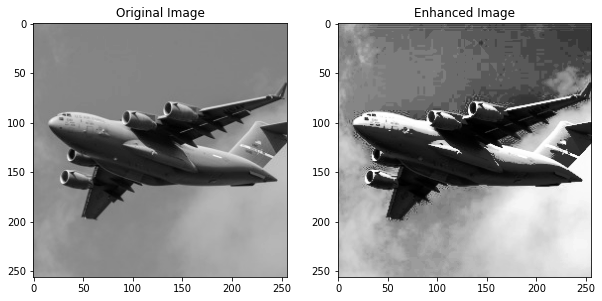

In [34]:
image = cv2.imread('images/plane_256x256.jpeg', cv2.IMREAD_GRAYSCALE)

# 이미지 대비를 향상
image_enhanced = cv2.equalizeHist(image)

# plot
fig, ax = plt.subplots(1,2, figsize=(10, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(image_enhanced, cmap='gray')
ax[1].set_title('Enhanced Image')

컬러 이미지의 경우 먼저 YUV 컬러 포맷으로 변환해야 한다. Y는 루마 또는 밝기이고 U와 V는 컬러를 나타낸다. 변환한 뒤에 위와 동일하게 equlizeHist() 메소드를 적용하고 다시 RGB 포맷으로 변환 후 출력한다.



Text(0.5, 1.0, 'Enhanced Color Image')

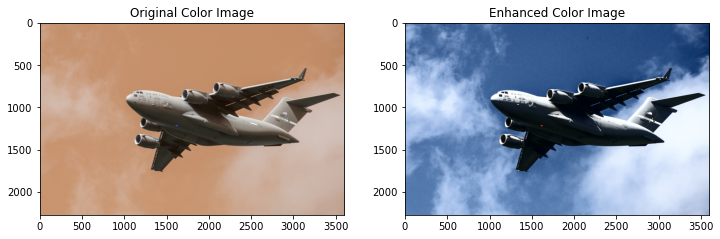

In [35]:
image_bgr = cv2.imread('images/plane.jpeg')

# YUV 컬로 포맷으로 변환
image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV)
# 히스토그램 평활화 적용
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])
# #RGB로 변환
image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)

# plot
fig, ax = plt.subplots(1,2, figsize=(12, 8))
ax[0].imshow(image_bgr, cmap='gray')
ax[0].set_title('Original Color Image')
ax[1].imshow(image_rgb, cmap='gray')
ax[1].set_title('Enhanced Color Image')

# 9. 이미지 이진화
이미지 이진화(임계처리)는 어떤 값보다 큰 값을 가진 픽셀을 흰색으로 만들고 작은 값을 가진 픽셀은 검은색으로 만드는 과정이다. 더 고급 기술은 적응적 이진화(Adaptive Thresholding)로, 픽셀의 임곗값이 주변 픽셀의 강도에 의해 결정된다. 이는 이미지 안의 영역마다 빛 조건이 달라질 때 도움이 된다.

In [36]:
# 이미지 로드 
image_grey = cv2.imread('images/plane_256x256.jpeg', cv2.IMREAD_GRAYSCALE)


# Adaptive Thresholding 적용 
max_output_value = 255   # 출력 픽셀 강도의 최대값
neighborhood_size = 99
subtract_from_mean = 10
image_binarized = cv2.adaptiveThreshold(image_grey,
                                       max_output_value,
                                       cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv2.THRESH_BINARY,
                                       neighborhood_size,
                                       subtract_from_mean)

adaptiveThreshold() 함수에는 네 개의 중요한 매개변수가 있다.



*   max_output_value : 출력 픽셀 강도의 최댓값 저장
*   cv2.ADAPTIVE_THRESH_GAUSSIAN_C : 픽셀의 임곗값을 주변 픽셀 강도의 가중치 합으로 설정. 가중치는 가우시안 윈도우에 의해 결정
* cv2.ADAPTIVE_THRESH_MEAN_C : 주변 픽셀의 평균을 임곗값으로 설정

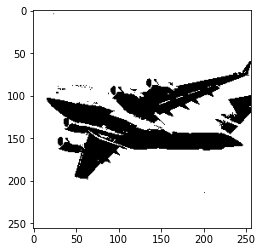

In [37]:
# plot
plt.imshow(image_binarized, cmap='gray')
plt.show()

# 10. 배경 제거
배경을 제거하고자 하는 전경 주위에 사각형 박스를 그리고 그랩컷(grabCut) 알고리즘을 적용하여 배경을 제거한다.
grabCut의 경우 잘 작동하더라도 여전히 이미지에 제거하지 못한 배경이 발생할 수 있다. 이렇게 제거 되지 못한 부분은 다시 적용하여 제거할 수 있지만 실전에서 수 천장의 이미지를 수동으로 고치는 것은 불가능한 일이므로 머신러닝을 적용한다거나 할 때도 일부러 noise를 적용하는 것처럼 일부 배경이 남아있는 것을 수용하는 것이 좋다.

In [38]:
# 이미지 로드 후 RGB로 변환
image_bgr = cv2.imread('images/plane_256x256.jpeg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

In [39]:
# 사각형 좌표: 시작점의 x,y  ,넢이, 너비
rectangle = (0, 56, 256, 150)

# 초기 마스크 생성
mask = np.zeros(image_rgb.shape[:2], np.uint8)

# grabCut에 사용할 임시 배열 생성
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# grabCut 실행
cv2.grabCut(image_rgb, # 원본 이미지
           mask,       # 마스크
           rectangle,  # 사각형
           bgdModel,   # 배경을 위한 임시 배열
           fgdModel,   # 전경을 위한 임시 배열 
           5,          # 반복 횟수
           cv2.GC_INIT_WITH_RECT) # 사각형을 위한 초기화

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[ 3.53001848e-01,  8.34801667e-02,  3.17890756e-01,
          1.17774722e-01,  1.27852508e-01,  7.96780497e+01,
          1.42470721e+02,  1.96177137e+02,  1.40812870e+02,
          1.71967825e+02,  2.02413127e+02,  8.70570502e+01,
          1.46625253e+02,  1.97379749e+02,  1.57073709e+02,
          1.80004744e+02,  2.05018062e+02,  1.08573950e+02,
          1.57772605e+02,  2.02281681e+02,  2.82178017e+00,
          1.73342110e+00,  1.51563644e+00,  1.73342110e+00,
          1.49457735e+00,  1.20667170e+00,  1.51563644e+00,
          1.20667170e+00,  1.13541104e+00,  4.99168485e+01,
          2.02956522e+01, -5.62359237e+00,  2.02956522e+01,
          9.57296734e+00, -1.93883116e+00, -5.62359237e+00,
         -1.93883116e+00,  3.18299369e+00,  3.59932303

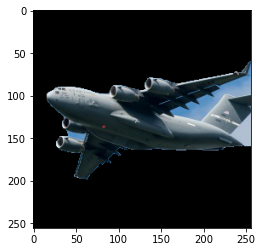

In [40]:
# 배경인 곳은 0, 그 외에는 1로 설정한 마스크 생성
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

# 이미지에 새로운 마스크를 곱행 배경을 제외
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]

# plot
plt.imshow(image_rgb_nobg)
plt.show()

위에서 먼저 전경이 들어있는 영역 주위를 사각형으로 표시하였는데, grabCut은 이 사각형 밖에 있는 모든 것이 배경이라고 가정하고 이 정보를 사용하여 사각형 안에 있는 배경을 찾는다.

왼쪽 그림의 검은 영역은 배경이라고 확실하게 가정한 사각형의 바깥쪽 영역이며, 회색 영역은 그랩컷이 배경이라고 생각하는 영역, 그리고 흰색 영역은 전경이다. 오른쪽 그림은 두 번째 마스크를 이미지에 적용하여 전경만 남긴 이미지이다.

# 11. 경계선 감지
Canny()메소드를 활용하여 경계선을 감지 할 수 있다. Canny()메소드는 그래디언트 임곗값 사이의 저점과 고점을 나타내는 두 매개변수를 필요로 하며, 낮은 임곗값과 높은 임곗값 사이의 가능성 있는 경계선 픽셀은 약한 경계선 픽셀로 간주하고, 높은 임곗값보다 큰 픽셀은 강한 경계선 픽셀로 간주한다.

In [41]:
# 이미지 로드
image_gray = cv2.imread('images/plane_256x256.jpeg', cv2.IMREAD_GRAYSCALE)

# 픽셀 강도의 중간값을 계산
median_intensity = np.median(image_gray)

# 중간 픽셀 강도에서 위아래 1 표준편차 떨어진 값을 임곗값으로 지정
lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))

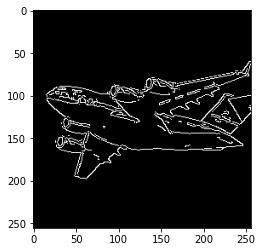

In [42]:
# Canny edge detection 적용
image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)

plt.imshow(image_canny, cmap='gray')
plt.show()

reference: https://velog.io/@jaehyeong/OpenCV%EB%A5%BC-%ED%99%9C%EC%9A%A9%ED%95%9C-%EA%B8%B0%EC%B4%88-%EC%9D%B4%EB%AF%B8%EC%A7%80-%EC%B2%98%EB%A6%AC-with-Python